In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
x,y = mnist.data, mnist.target

In [4]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

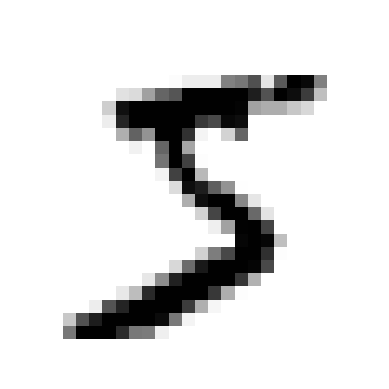

In [7]:
import matplotlib.pyplot as plt

def plot_digit(image_data) :
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap='binary')
  plt.axis('off')

some_digit = x[0]
plot_digit(some_digit)
plt.show()

In [8]:
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

In [9]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)

DummyClassifier()

In [14]:
print(any(dummy_clf.predict(x_train)))

False


In [15]:
cross_val_score(dummy_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
print(cm)

[[53892   687]
 [ 1891  3530]]


In [18]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [19]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [20]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [21]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [22]:
threshold = 3370.0194991439557
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [23]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

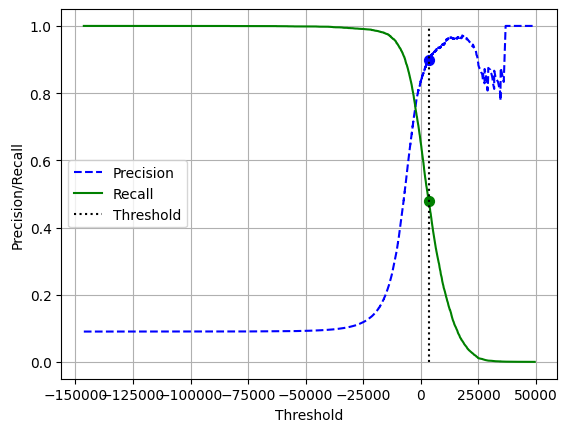

In [24]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.vlines(threshold, 0,1.0, "k", "dotted", label = "Threshold")
plt.grid()
interswction = np.argmin(np.abs(thresholds - threshold))
plt.scatter(thresholds[interswction], precisions[interswction], color="blue", s = 50)
plt.scatter(thresholds[interswction], recalls[interswction], color="green", s = 50)
# Removed recalls[interswction] as it was causing the conflict
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.show()

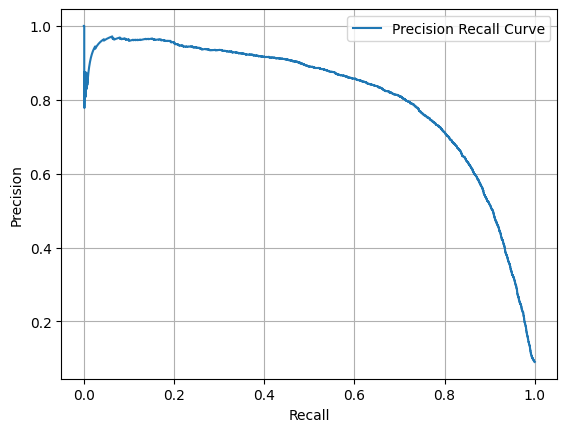

In [25]:
plt.plot(recalls, precisions, label = "Precision Recall Curve")


plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

In [26]:
idx_for_90_precision = np.argmax(precisions >= 0.9)
threshold_90_precision = thresholds[idx_for_90_precision]
threshold_90_precision

3370.0194991439557

In [27]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [29]:
idx_for_threshold_at_90 = np.argmax(thresholds <= threshold_90_precision)
fpr_90, tpr_90 = fpr[idx_for_threshold_at_90],tpr[idx_for_threshold_at_90]


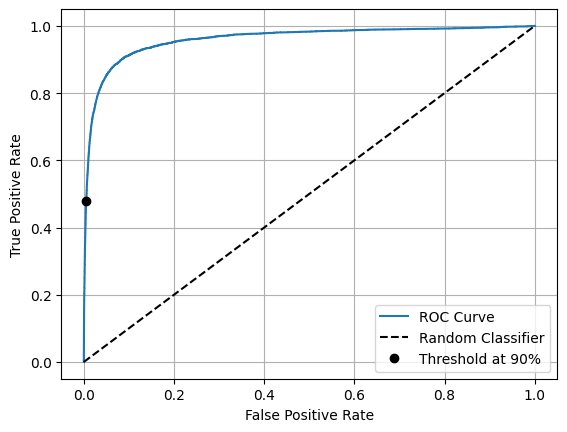

In [30]:
plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot([0,1], [0,1], "k--", label = "Random Classifier")
plt.plot([fpr_90],[tpr_90],"ko", label = "Threshold at 90%")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method="predict_proba")

In [33]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [34]:
y_scores_forest = y_probas_forest[:,1]
pr_forest, re_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

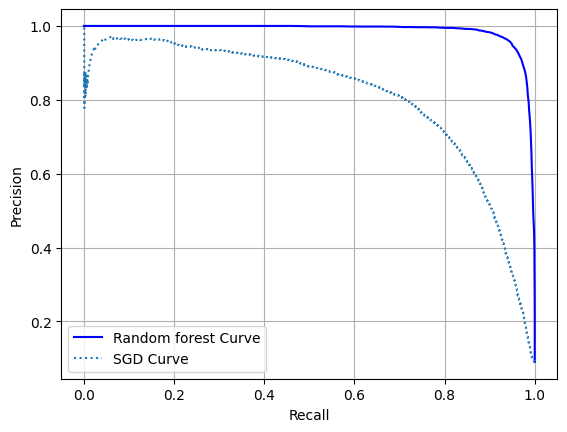

In [35]:
plt.plot(re_forest, pr_forest, "b-", label = "Random forest Curve")
plt.plot(recalls, precisions, linestyle="dotted",label = "SGD Curve")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

In [36]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [37]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [38]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred_forest))
print(recall_score(y_train_5, y_train_pred_forest))

0.9897468089558485
0.8725327430363402


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred_forest)
print(cm)

[[54530    49]
 [  691  4730]]


In [40]:
from sklearn.svm import SVC
svm_clf = SVC(random_state = 42)
svm_clf.fit(x_train[:2000], y_train[:2000])

SVC(random_state=42)

In [41]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [42]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [43]:
class_id = some_digit_scores.argmax()
class_id

5

In [44]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [45]:
svm_clf.classes_[class_id]

'5'

In [46]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(x_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [47]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [48]:
len(ovr_clf.estimators_)

10

In [49]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [50]:
cross_val_score(sgd_clf,x_train,y_train,cv=4, scoring = "accuracy")

array([0.85346667, 0.8756    , 0.86573333, 0.8816    ])

In [51]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train, y_train)
forest_clf.predict([some_digit])
#

array(['5'], dtype=object)

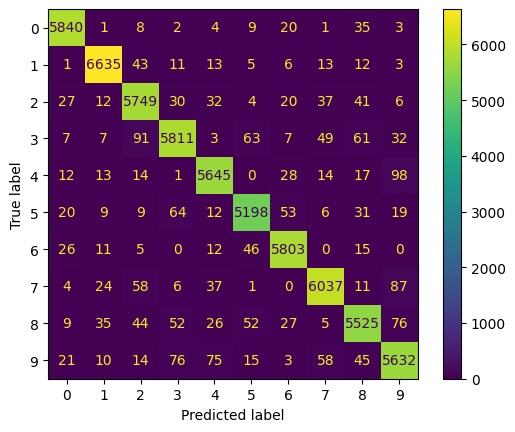

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(forest_clf, x_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

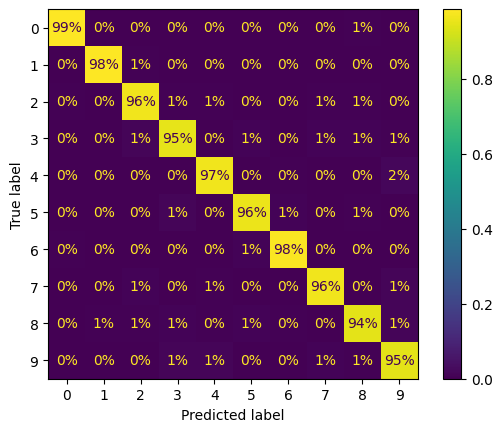

In [54]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [55]:
cla, clb = '3','5'
X_aa = x_train[(y_train == cla) & (y_train_pred == cla)]
X_ab = x_train[(y_train == cla) & (y_train_pred == clb)] # Changed y_train to x_train
X_ba = x_train[(y_train == clb) & (y_train_pred == cla)]
X_bb = x_train[(y_train == clb) & (y_train_pred == clb)] # Changed y_train to x_train


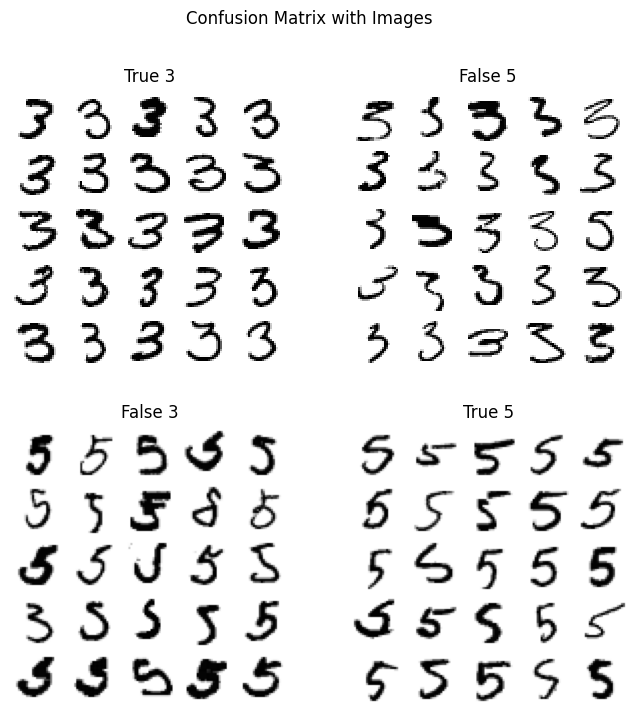

In [56]:
import matplotlib.pyplot as plt
import numpy as np

def plot_digits_confusion_matrix(X_aa, X_ab, X_ba, X_bb, cla, clb):
    """Plots a confusion matrix with images of digits instead of counts.

    Args:
        X_aa: Array of images correctly classified as cla.
        X_ab: Array of images incorrectly classified as clb when they were cla.
        X_ba: Array of images incorrectly classified as cla when they were clb.
        X_bb: Array of images correctly classified as clb.
        cla: Label for class 'a' (e.g., '3').
        clb: Label for class 'b' (e.g., '5').
    """

    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    fig.suptitle("Confusion Matrix with Images")

    # Plot images for each quadrant
    axes[0, 0].imshow(create_image_grid(X_aa), cmap='binary')
    axes[0, 0].set_title(f"True {cla}")
    axes[0, 1].imshow(create_image_grid(X_ab), cmap='binary')
    axes[0, 1].set_title(f"False {clb}")
    axes[1, 0].imshow(create_image_grid(X_ba), cmap='binary')
    axes[1, 0].set_title(f"False {cla}")
    axes[1, 1].imshow(create_image_grid(X_bb), cmap='binary')
    axes[1, 1].set_title(f"True {clb}")

    # Turn off axis ticks and labels
    for ax in axes.flat:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')

    plt.show()

def create_image_grid(images, grid_size=(5, 5)):
    """Creates a grid of images for display in the confusion matrix."""

    # Select a random subset of images if there are too many
    num_images = min(len(images), grid_size[0] * grid_size[1])
    images = images[np.random.choice(len(images), num_images, replace=False)]

    # Reshape images into a grid
    image_grid = images.reshape(grid_size[0], grid_size[1], 28, 28)
    image_grid = image_grid.transpose(0, 2, 1, 3)
    image_grid = image_grid.reshape(grid_size[0] * 28, grid_size[1] * 28)

    return image_grid

# Call the function to plot the confusion matrix
plot_digits_confusion_matrix(X_aa, X_ab, X_ba, X_bb, cla, clb)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [58]:
cross_val_score(knn_clf,x_train,y_train,cv=4, scoring = "accuracy")

array([0.96846667, 0.9698    , 0.968     , 0.9674    ])

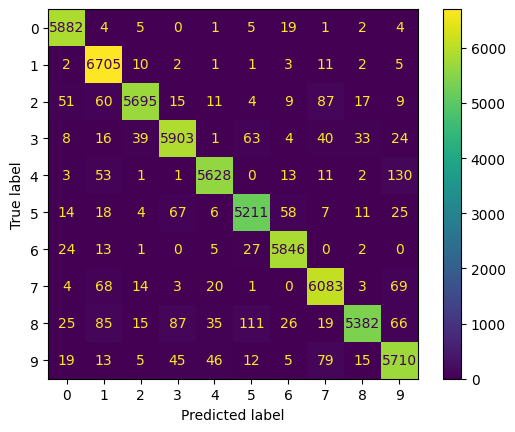

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred_nn = cross_val_predict(knn_clf, x_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_nn)
plt.show()

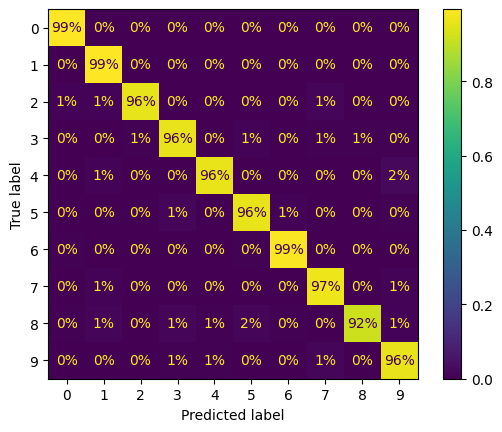

In [60]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_nn, normalize="true", values_format=".0%")
plt.show()

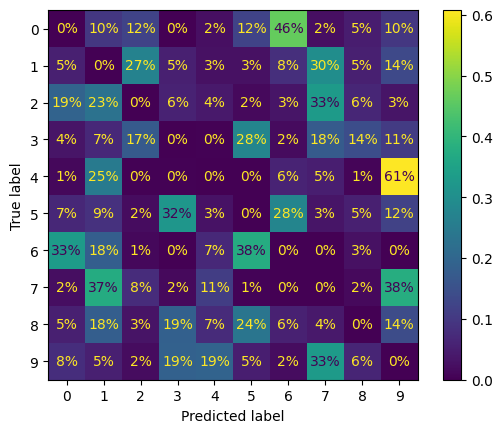

In [61]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_nn,sample_weight=(y_train != y_train_pred_nn), normalize="true", values_format=".0%")
plt.show()

In [62]:
cla, clb = '3','5'
X_aa = x_train[(y_train == cla) & (y_train_pred == cla)]
X_ab = x_train[(y_train == cla) & (y_train_pred == clb)] # Changed y_train to x_train
X_ba = x_train[(y_train == clb) & (y_train_pred == cla)]
X_bb = x_train[(y_train == clb) & (y_train_pred == clb)] # Changed y_train to x_train

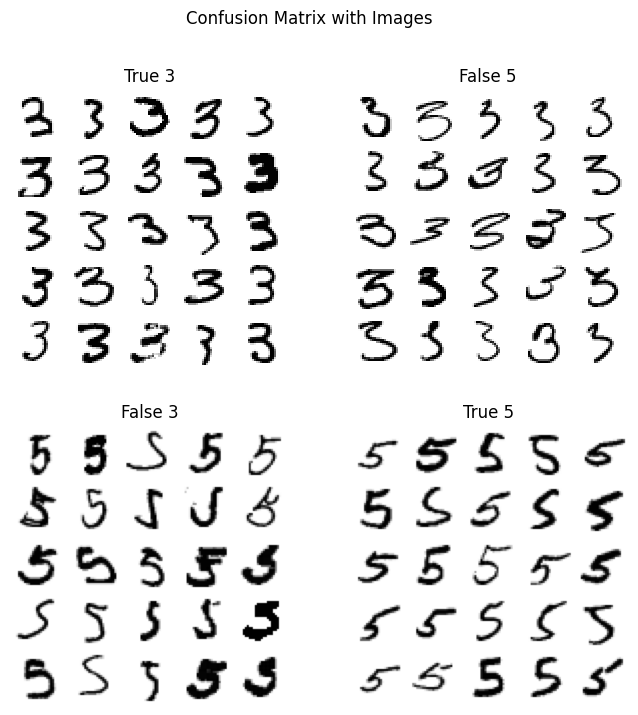

In [63]:
import matplotlib.pyplot as plt
import numpy as np

def plot_digits_confusion_matrix(X_aa, X_ab, X_ba, X_bb, cla, clb):
    """Plots a confusion matrix with images of digits instead of counts.

    Arguments:
        X_aa: Array of images correctly classified as cla.
        X_ab: Array of images incorrectly classified as clb when they were cla.
        X_ba: Array of images incorrectly classified as cla when they were clb.
        X_bb: Array of images correctly classified as clb.
        cla: Label for class 'a' (e.g., '3').
        clb: Label for class 'b' (e.g., '5').
    """

    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    fig.suptitle("Confusion Matrix with Images")

    # Plot images for each quadrant
    axes[0, 0].imshow(create_image_grid(X_aa), cmap='binary')
    axes[0, 0].set_title(f"True {cla}")
    axes[0, 1].imshow(create_image_grid(X_ab), cmap='binary')
    axes[0, 1].set_title(f"False {clb}")
    axes[1, 0].imshow(create_image_grid(X_ba), cmap='binary')
    axes[1, 0].set_title(f"False {cla}")
    axes[1, 1].imshow(create_image_grid(X_bb), cmap='binary')
    axes[1, 1].set_title(f"True {clb}")

    # Turn off axis ticks and labels
    for ax in axes.flat:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')

    plt.show()

def create_image_grid(images, grid_size=(5, 5)):
    """Creates a grid of images for display in the confusion matrix."""

    # Select a random subset of images if there are too many
    num_images = min(len(images), grid_size[0] * grid_size[1])
    images = images[np.random.choice(len(images), num_images, replace=False)]

    # Reshape images into a grid
    image_grid = images.reshape(grid_size[0], grid_size[1], 28, 28)
    image_grid = image_grid.transpose(0, 2, 1, 3)
    image_grid = image_grid.reshape(grid_size[0] * 28, grid_size[1] * 28)

    return image_grid

# Call the function to plot the confusion matrix
plot_digits_confusion_matrix(X_aa, X_ab, X_ba, X_bb, cla, clb)

In [64]:
f1_score(y_train, y_train_pred_nn, average='macro')

0.9672164755274893